In [3]:
import kagglehub
import os
import pandas as pd

path = kagglehub.dataset_download("bappekim/air-pollution-in-seoul")
print("path to dataset:", path)

100%|█████████████████████████████████| 19.7M/19.7M [00:04<00:00, 5.13MB/s]

Extracting files...


path to dataset: /Users/john1256/.cache/kagglehub/datasets/bappekim/air-pollution-in-seoul/versions/2


In [11]:
file_path = '/Users/john1256/.cache/kagglehub/datasets/bappekim/air-pollution-in-seoul/versions/2/AirPollutionSeoul/Measurement_summary.csv'
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(f"Data size : {df.shape[0]} x {df.shape[1]}")
    print("\nColumn list:")
    for col in df.columns:
        print(f" - {col}")
    print("\nThe first 5 rows:")
    print(df.head())
    print("\nData type:")
    print(df.dtypes)
    print('\nStatistical information:')
    print(df.describe())
    missing_values = df.isnull().sum()
    print("\nNumber of Missing values:")
    print(missing_values)
    print("\nNumber of unique values:")
    for col in df.columns:
        print(f" - {col}: {df[col].nunique()}")
else:
    print(f"File not found: {file_path}")
    

Data size : 647511 x 11

Column list:
 - Measurement date
 - Station code
 - Address
 - Latitude
 - Longitude
 - SO2
 - NO2
 - O3
 - CO
 - PM10
 - PM2.5

The first 5 rows:
   Measurement date  Station code  \
0  2017-01-01 00:00           101   
1  2017-01-01 01:00           101   
2  2017-01-01 02:00           101   
3  2017-01-01 03:00           101   
4  2017-01-01 04:00           101   

                                             Address   Latitude   Longitude  \
0  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   
1  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   
2  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   
3  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   
4  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   

     SO2    NO2     O3   CO  PM10  PM2.5  
0  0.004  0.059  0.002  1.2  73.0   57.0  
1  0.004  0.058  0.002  1.2  71.0   59.0  
2

In [13]:
df['Measurement date'] = pd.to_datetime(df['Measurement date'])
print(df.dtypes)

Measurement date    datetime64[ns]
Station code                 int64
Address                     object
Latitude                   float64
Longitude                  float64
SO2                        float64
NO2                        float64
O3                         float64
CO                         float64
PM10                       float64
PM2.5                      float64
dtype: object


In [14]:
import numpy as np
for col in ['SO2', 'NO2', 'CO', 'O3', 'PM10', 'PM2.5']:
    df[col] = df[col].replace(-1,np.nan)
df['Year'] = df['Measurement date'].dt.year
df['Month'] = df['Measurement date'].dt.month
df['Day'] = df['Measurement date'].dt.day
df['Hour'] = df['Measurement date'].dt.hour
missing_counts = df[['SO2', 'NO2', 'CO', 'O3', 'PM10', 'PM2.5']].isnull().sum()
print("Number of missing values in each column:")
print(missing_counts)

Number of missing values in each column:
SO2      3976
NO2      3834
CO       4036
O3       4059
PM10     3962
PM2.5    3973
dtype: int64


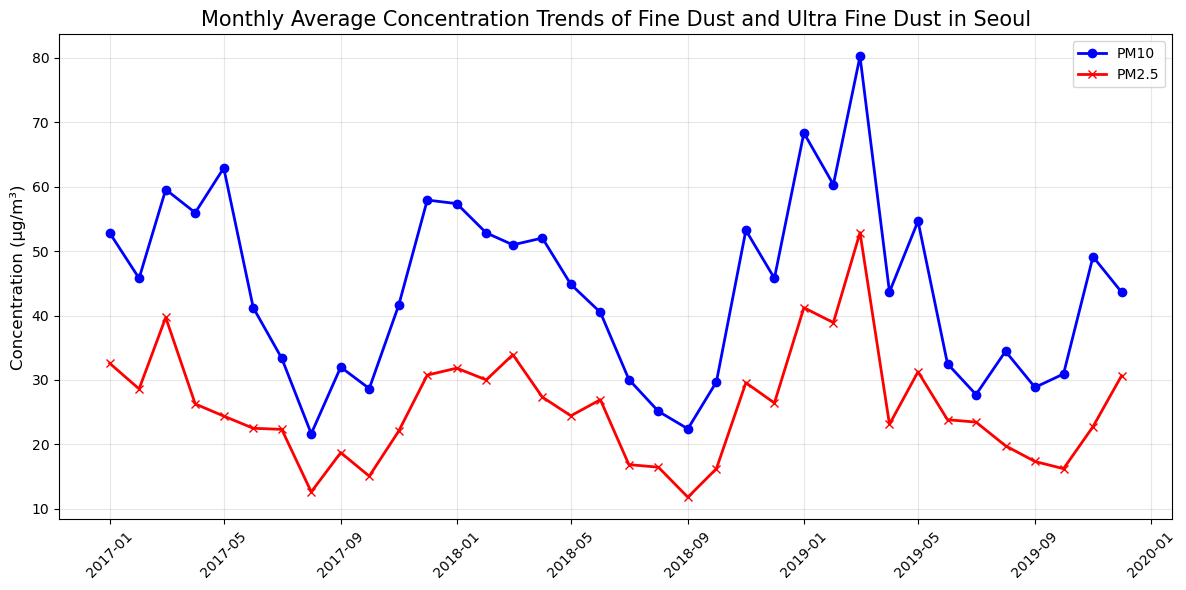

In [17]:
from datetime import datetime

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
monthly_avg = df.groupby(['Year', 'Month'])[['PM10', 'PM2.5']].mean().reset_index()
monthly_avg['Date'] = monthly_avg.apply(lambda x: datetime(int(x['Year']), int(x['Month']), 1), axis=1)
monthly_avg = monthly_avg.sort_values(by='Date')
plt.plot(monthly_avg['Date'], monthly_avg['PM10'], label='PM10', color='blue', linewidth=2, marker='o')
plt.plot(monthly_avg['Date'], monthly_avg['PM2.5'], label='PM2.5', color='red', linewidth=2, marker='x')
plt.title('Monthly Average Concentration Trends of Fine Dust and Ultra Fine Dust in Seoul', fontsize=15)
plt.ylabel('Concentration (µg/m³)', fontsize=12)
plt.grid(True, alpha = 0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

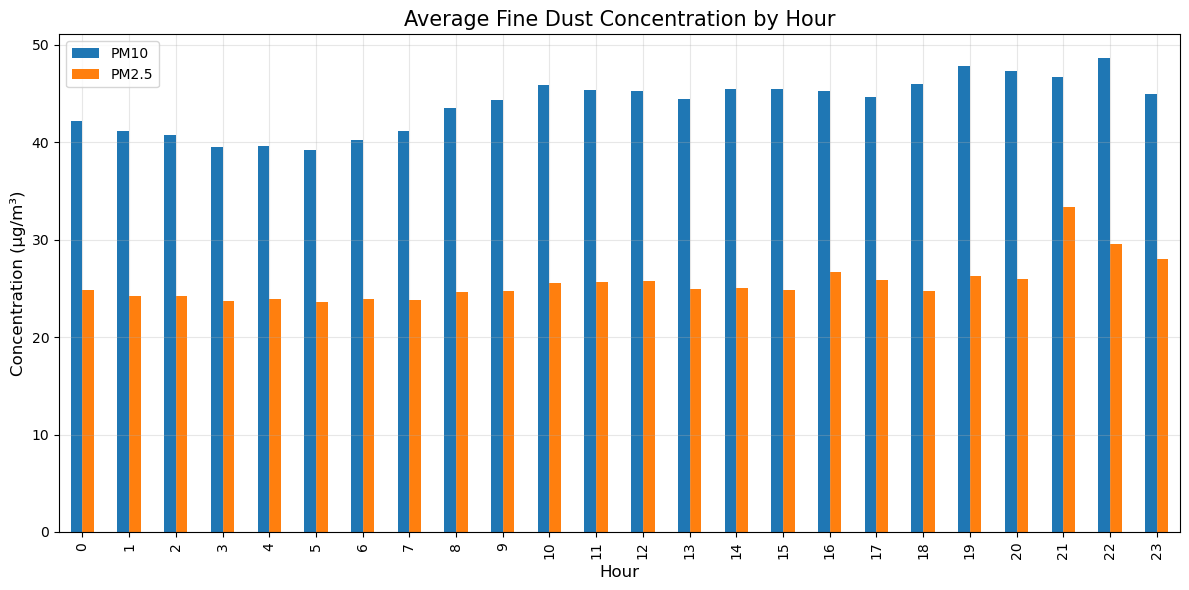

In [18]:
plt.figure(figsize=(12, 6))
hourly_avg = df.groupby('Hour')[['PM10', 'PM2.5']].mean()
hourly_avg.plot(kind = 'bar', figsize=(12,6))
plt.title('Average Fine Dust Concentration by Hour', fontsize=15)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Concentration (µg/m³)', fontsize=12)
plt.grid(True, alpha = 0.3)
plt.tight_layout()
plt.show()

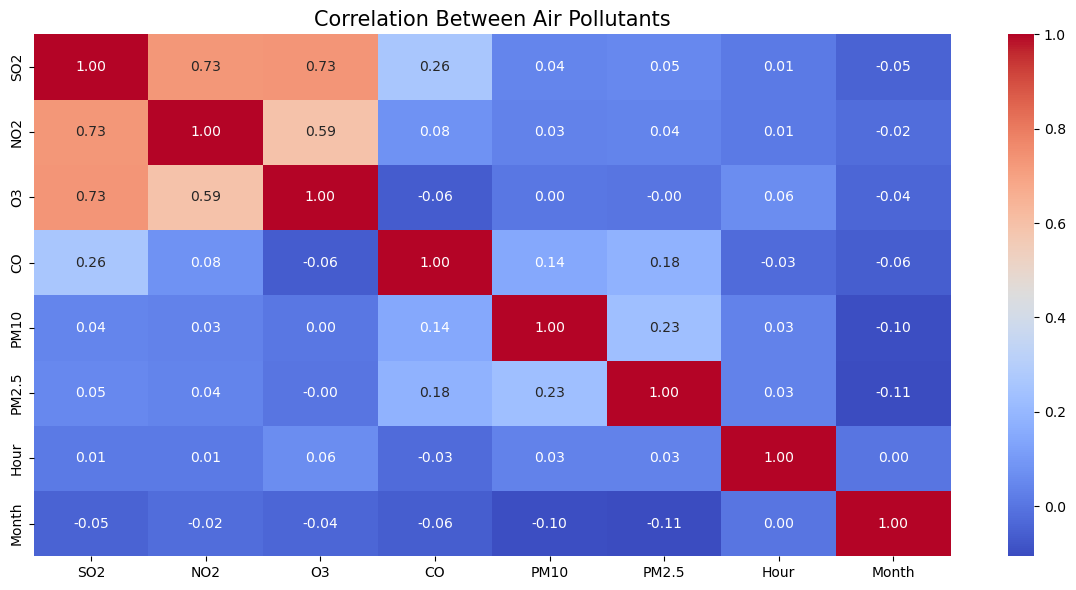

In [19]:
import seaborn as sns

plt.figure(figsize=(12, 6))
corr = df[['SO2', 'NO2', 'O3','CO', 'PM10', 'PM2.5', 'Hour', 'Month']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Air Pollutants', fontsize=15)
plt.tight_layout()
plt.show()

